In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

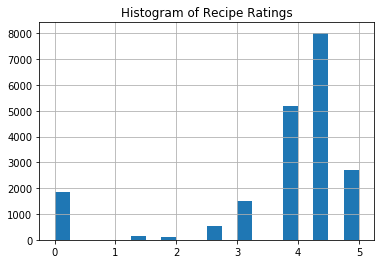

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [7]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

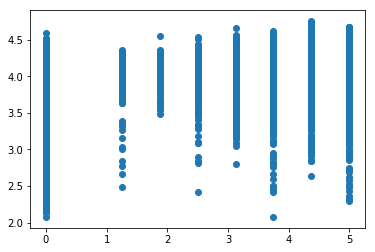

In [11]:
plt.scatter(Y, svr.predict(X))

In [9]:
svr.score(X, Y)

0.03856570651298896

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

array([0.01818511, 0.026411  , 0.03037705, 0.01957949, 0.02451197])

In [13]:
#Transform this regression problem into a binary classifier
raw_data['perfect_5'] = 0
raw_data.loc[(raw_data['rating'] < 5), 'perfect_5'] = 1

In [14]:
# Use Random Forest Classifier to score features

from sklearn.ensemble import RandomForestClassifier 

X = raw_data.drop(['perfect_5', 'title', 'rating', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.perfect_5

rfc = RandomForestClassifier()
rfc.fit(X, Y)

feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances[0:30], '\n', feature_importances[0:30].index)

                   importance
bon appétit          0.015458
gourmet              0.013424
quick & easy         0.012120
summer               0.010930
winter               0.009560
onion                0.009255
vegetarian           0.009202
egg                  0.009017
milk/cream           0.008317
wheat/gluten-free    0.008095
fall                 0.008010
tree nut free        0.007931
kid-friendly         0.007833
tomato               0.007440
kosher               0.007222
dairy                0.007165
garlic               0.007164
no sugar added       0.007157
herb                 0.007006
dairy free           0.006985
bake                 0.006978
sugar conscious      0.006959
kidney friendly      0.006888
peanut free          0.006833
christmas            0.006769
healthy              0.006667
thanksgiving         0.006625
spring               0.006624
fruit                0.006509
dessert              0.006452 
 Index(['bon appétit', 'gourmet', 'quick & easy', 'summer', 'winter',

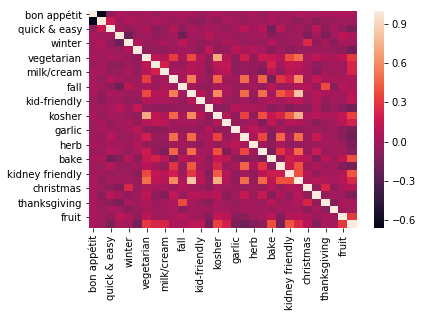

In [18]:
X = raw_data[['bon appétit', 'gourmet', 'quick & easy', 'summer', 'winter', 'onion',
       'vegetarian', 'egg', 'milk/cream', 'wheat/gluten-free', 'fall',
       'tree nut free', 'kid-friendly', 'tomato', 'kosher', 'dairy', 'garlic',
       'no sugar added', 'herb', 'dairy free', 'bake', 'sugar conscious',
       'kidney friendly', 'peanut free', 'christmas', 'healthy',
       'thanksgiving', 'spring', 'fruit', 'dessert']]

sns.heatmap(X.corr())

In [19]:
raw_data = raw_data.dropna()

In [20]:
from sklearn.svm import SVC

svc = SVC()
X = raw_data[['sodium', 'protein', 'bon appétit', 'summer',
       'quick & easy', 'gourmet', 'vegetarian', 'fall', 'bake', 'onion',
       'wheat/gluten-free', 'winter', 'milk/cream', 'garlic', 'tomato',
       'fruit', 'thanksgiving', 'kid-friendly', 'sauce', 'kosher', 'soy free',
       'egg', 'backyard bbq', 'tree nut free', 'pescatarian', 'roast', 'herb',
       'christmas']]
Y = raw_data.perfect_5
svc.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
svc.score(X, Y)

0.8859051941502774

In [22]:
cross_val_score(svc, X, Y, cv=5)

array([0.8673598 , 0.86983927, 0.86920895, 0.8685372 , 0.86759142])